In [1]:
import os
import random
import numpy as np
import pandas as pd

from PIL import Image
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

In [2]:
data = []
labels = []
# The dataset is available at: 
# https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
data_path = "Data/Train/"
num_classes = len(os.listdir(data_path))
print("Number of classes:", num_classes)

Number of classes: 43


In [3]:
# Retrieving the images and their labels
for i in range(num_classes):
    path = os.path.join(data_path, str(i))
    images = os.listdir(path) 
    for img in images:
        try:
            image = Image.open(path + "\\" + img)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [4]:
# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print("Shape of image data:", data.shape)
print("Shape of image labels:", labels.shape)

Shape of image data: (39209, 30, 30, 3)
Shape of image labels: (39209,)


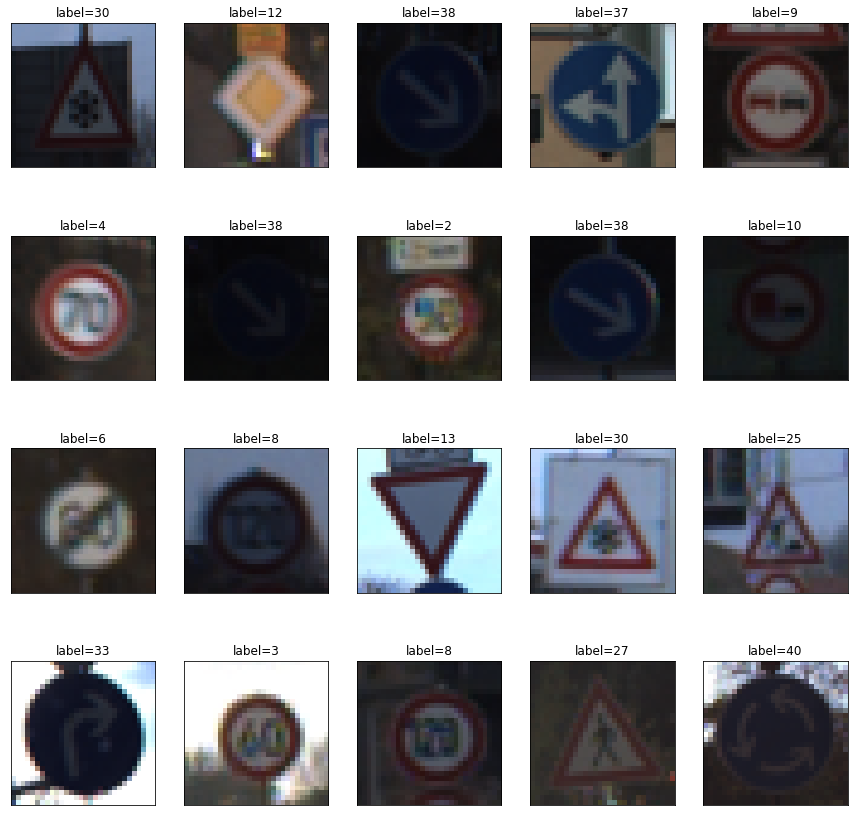

In [5]:
# Visualizing some traffic signs classes
num_samples = 20
plt.figure(figsize=(15, 15))
for i in range(num_samples):
    rand_img = random.randint(0, data.shape[0] - num_samples)
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(data[i + rand_img])
    plt.title("label=" + str(labels[i + rand_img]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [6]:
# Loading test images
test_file = pd.read_csv(os.path.join("Data", "Test.csv"))
test_labels = test_file["ClassId"].values
test_imgs = test_file["Path"].values
test_data = []

test_file.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [7]:
# Retrieving the images on test dataset
for img in test_imgs:
    try:
        image = Image.open(os.path.join("Data", img))
        image = image.resize((30, 30))
        test_data.append(np.array(image))
    except:
        print("Error loading image")

test_data = np.array(test_data)

In [15]:
# Printing the shape of inputdata and their labels
print("Shape of train data:", data.shape)
print("Shape of test data:", test_data.shape)
print("Shape of train labels:", labels.shape)
print("Shape of test labels:", test_labels.shape)

Shape of train data: (39209, 30, 30, 3)
Shape of test data: (12630, 30, 30, 3)
Shape of train labels: (39209,)
Shape of test labels: (12630,)


In [9]:
# Reshape the training and test examples
X_train_flat = data.reshape(data.shape[0], -1)
X_test_flat = test_data.reshape(test_data.shape[0], -1)

# Standardize the dataset
X_train = X_train_flat.astype('float32') / 255.
X_test = X_test_flat.astype('float32') / 255.

In [10]:
# Fit the model using Logistic Regression class from sklearn 
model = LogisticRegression(max_iter=4000, random_state=10)
model.fit(X_train, labels)

LogisticRegression(max_iter=4000, random_state=10)

In [11]:
# Accuracy on train dataset
train_pred = model.predict(X_train)
print(train_pred)
print("Train Accuracy: {:.4f}\n".format(model.score(X_train, labels)))

[ 0  0  0 ... 42 42 42]
Train Accuracy: 0.9912



In [12]:
# Accuracy on test dataset
test_pred = model.predict(X_test)
print(test_pred)
print("Test Accuracy: {:.4f}\n".format(model.score(X_test, test_labels)))

[16  1 38 ... 15  7  4]
Test Accuracy: 0.8563



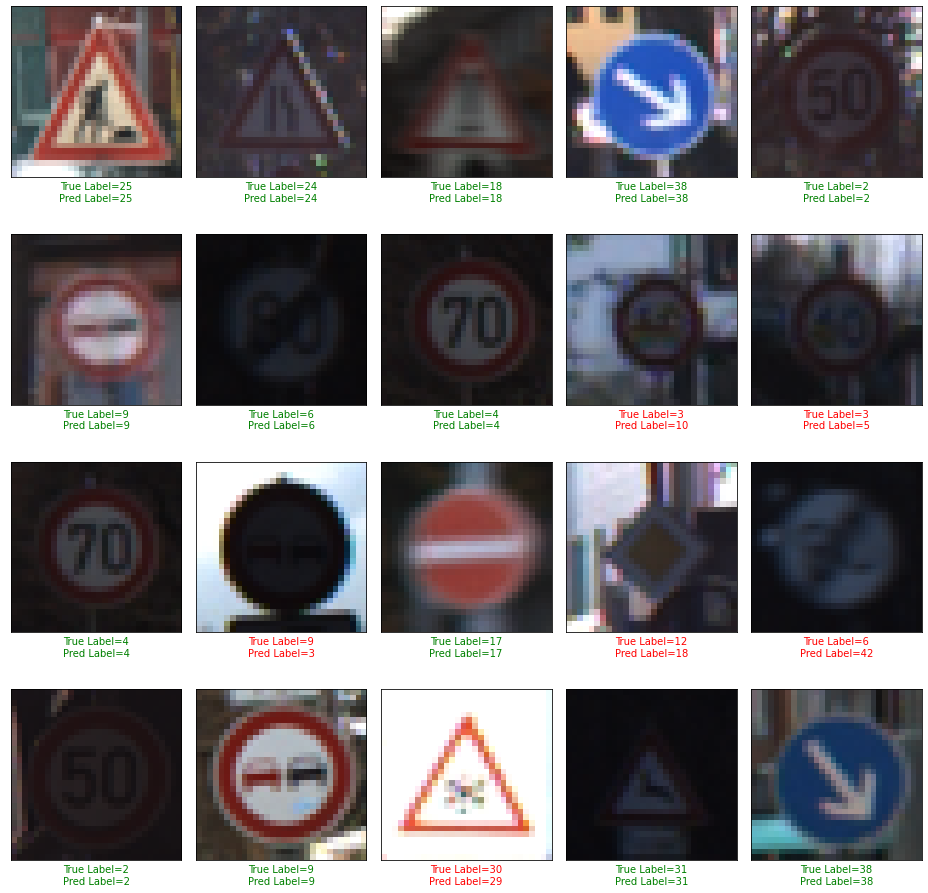

In [14]:
# Visualize model predictions
plt.figure(figsize=(13, 13))
num_samples = 20
for i in range(num_samples):
    rand_img = random.randint(0, test_data.shape[0] - num_samples)
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    pred_lbl = test_pred[i + rand_img]
    true_lbl = test_labels[i + rand_img]
    lbl_color = 'g'
    if pred_lbl != true_lbl:
        lbl_color = 'r'
    plt.xlabel("True Label={}\nPred Label={}".format(true_lbl, pred_lbl), color=lbl_color)
    plt.imshow(test_data[i + rand_img])
plt.tight_layout()
plt.show()